In [1]:
pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.5/920.5 kB 17.3 MB/s eta 0:00:00


In [2]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
from arch.__future__ import reindexing
import warnings

In [3]:
data = pd.read_csv(f"/Users/vatsalchowdhary/Desktop/BITS Work/Modelling/ethereum.csv")

returns = 100 * data['Close'].pct_change().dropna()
plt.figure(figsize=(10,4))
plt.plot(returns)
plot_pacf(returns**2, method='ywm')
plt.show()
model = arch_model(returns, p=2, q=3)
model_fit = model.fit()
model_fit.summary()

FileNotFoundError: ignored

In [ ]:
rolling_predictions = []
test_size = 365

for i in range(0, test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[0][-1]))
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)
data1 = data.copy()
data1['Garch Volatility'] = rolling_predictions

In [ ]:
returns = 100 * data1['Close'].pct_change().dropna()
elfam = returns[1993:].rolling(10).std().tail(355)

a = data1[data1['Garch Volatility'] > 0]['Garch Volatility'].head(355)
b = elfam.to_numpy()
#a = a.to_numpy()
x = np.arange(0, 355)
y = a
plt.plot(x, y, color ="red")
y = b
plt.plot(x, y, color ="blue")
abs((b-a)/a).mean()

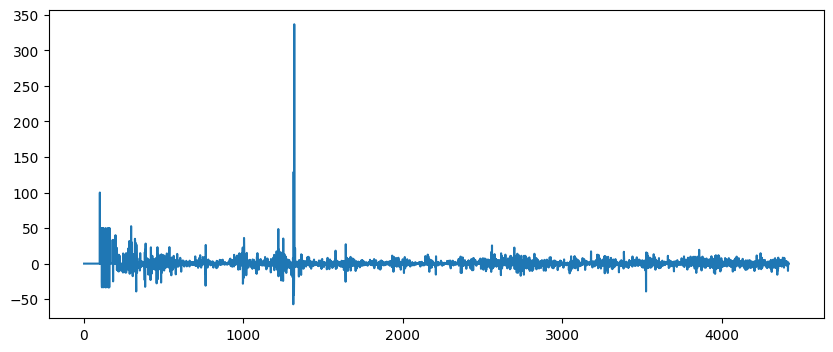

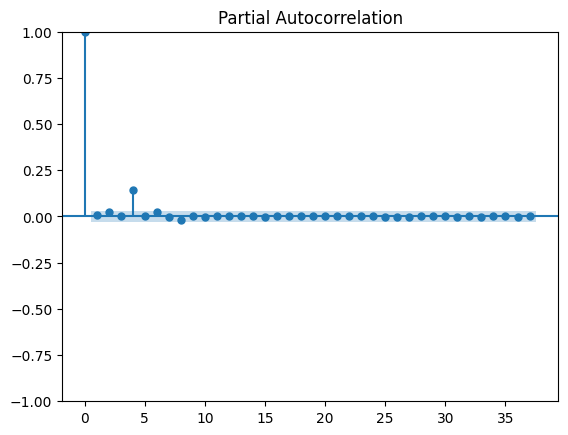

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1951695873.588651
Iteration:      2,   Func. Count:     13,   Neg. LLF: 18879.935032817015
Iteration:      3,   Func. Count:     21,   Neg. LLF: 292611.47088250966
Iteration:      4,   Func. Count:     28,   Neg. LLF: 15333.39716257156
Iteration:      5,   Func. Count:     35,   Neg. LLF: 13402.332893087012
Iteration:      6,   Func. Count:     42,   Neg. LLF: 13286.881440307745
Iteration:      7,   Func. Count:     47,   Neg. LLF: 13286.79161973596
Iteration:      8,   Func. Count:     52,   Neg. LLF: 13286.788459542928
Iteration:      9,   Func. Count:     57,   Neg. LLF: 13286.788174263074
Iteration:     10,   Func. Count:     62,   Neg. LLF: 13286.788161516548
Iteration:     11,   Func. Count:     66,   Neg. LLF: 13286.788161515331
Optimization terminated successfully    (Exit mode 0)
            Current function value: 13286.788161516548
            Iterations: 11
            Function evaluations: 66
            Gradient evalua

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -13286.8
Distribution:                  Normal   AIC:                           26581.6
Method:            Maximum Likelihood   BIC:                           26607.2
                                        No. Observations:                 4419
Date:                Sun, Apr 23 2023   Df Residuals:                     4418
Time:                        09:39:10   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.3532  8.029e-02      4.399  1.090e-05 [  0.196,  0.511]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          2.1655      1.225      1.767  7.721e-02   [ -0.236,  4.567]
alpha[1]       0.1283  2.960e-02      4.333  1.469e-05 [7.025e-02,  0.186]
beta[1]        0.8108  3.351e-02     24.196 2.429e-129   [  0.745,  0.877]
==========================================================================

Covariance estimator: robust
"""

In [4]:
data = pd.read_csv(f"bitcoin.csv")
returns = 100 * data['Close'].pct_change().dropna()
plt.figure(figsize=(10,4))
plt.plot(returns)
plot_pacf(returns**2, method='ywm')
plt.show()
model = arch_model(returns, p=1, q=1)
model_fit = model.fit()
model_fit.summary()

In [ ]:
rolling_predictions = []
test_size = 365
for i in range(0, test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=10)
    rolling_predictions.append(np.sqrt(pred.variance.values[0][-1]))
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)
data2 = data.copy()
data2['Garch Volatility'] = rolling_predictions

In [ ]:
returns = 100 * data2['Close'].pct_change().dropna()
elfam = returns[4055:].rolling(10).std().tail(355)
a = data2[data2['Garch Volatility'] > 0]['Garch Volatility'].head(355)
b = elfam.to_numpy()
a = a.to_numpy()
x = np.arange(0, 355)
y = a
plt.plot(x, y, color ="red")
y = b
plt.plot(x, y, color ="blue")
abs((a-b)/a).mean()

In [ ]:
data = pd.read_csv(f"/Users/vatsalchowdhary/Desktop/BITS Work/Modelling/tether.csv")

returns = 100 * data['Close'].pct_change().dropna()
plt.figure(figsize=(10,4))
plt.plot(returns)
plot_pacf(returns**2, method='ywm')
plt.show()
model = arch_model(returns, p=3, q=3)
model_fit = model.fit()
model_fit.summary()

In [ ]:
rolling_predictions = []
test_size = 365

for i in range(0, test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=10)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)
data3 = data.copy()
data3['Garch Volatility'] = rolling_predictions

In [ ]:
returns = 100 * data3['Close'].pct_change().dropna()
elfam = returns[1592:].rolling(10).std().tail(355)
a = data3[data3['Garch Volatility'] > 0]['Garch Volatility'].head(355)
b = elfam.to_numpy()
a = a.to_numpy()
x = np.arange(0, 355)
y = a
plt.plot(x, y, color ="red")
y = b
plt.plot(x, y, color ="blue")
abs((a-b)/a).mean()
